In [ ]:
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

# Распределение $ N (\theta, 1) $ :

In [184]:
sample = sps.norm.rvs(size=100)
cumsum = np.cumsum(sample)
max_lkh_est = np.array([abs(cumsum[i] / (i + 1)) for i in range (100)])

Функция для построения графиков байесовских оценок в зависимости от параметров и ОМП.

In [190]:
def dev_plot(shift_scale):
    plt.figure(figsize = (15,5))
    plt.plot(np.array(range(100)), max_lkh_est, label = 'Max_Likelihood', linewidth=2)
    for i in range (len(shift_scale)):
        bayes_est = np.array([abs((cumsum[j] + (shift_scale[i][0] / shift_scale[i][1])) / (1. / shift_scale[i][1] + j))
                              for j in range (100)])
        plt.plot(np.array(range(100)), bayes_est, label = '(%d, %d)' % (shift_scale[i][0], shift_scale[i][1]), linewidth=1)
    plt.legend()
    plt.ylim((0, 1))
    plt.show()

Сопряженное априорное распределение к нормальному с известной дисперсией - нормальное.

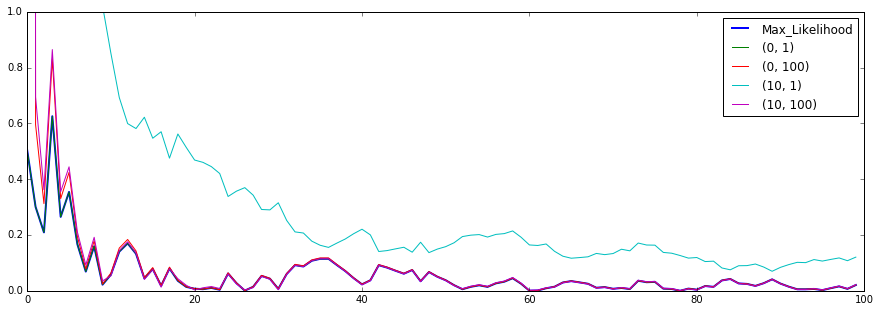

In [191]:
dev_plot([[0, 1], [0, 100], [10, 1], [10, 100]])

Байесовская оценка при некоторых параметрах априорного распределения лучше, чем ОМП.

# Распределение $ N (0, \theta) $ :

In [187]:
square_cumsum = np.cumsum(sample ** 2)
sqr_max_lkh_est = np.array([abs(square_cumsum[i] / (i + 1) - 1) for i in range (100)])

In [192]:
def sqr_dev_plot(shift_scale):
    plt.figure(figsize = (15,5))
    plt.plot(np.array(range(100)), sqr_max_lkh_est, label = 'Max_Likelihood', linewidth=2)
    for i in range (len(shift_scale)):
        bayes_est = np.array([abs((2 * shift_scale[i][0] + square_cumsum[j]) / (2 * shift_scale[i][1] + j - 1) - 1)
                              for j in range(100)])
        plt.plot(np.array(range(100)), bayes_est, label = '(%d, %d)' % (shift_scale[i][0], shift_scale[i][1]), linewidth=1)
    plt.legend()
    plt.ylim((0, 2))
    plt.show()

Cопряженное априорное распределение для нормального с известным матожиданием - обратное гамма-распределение.

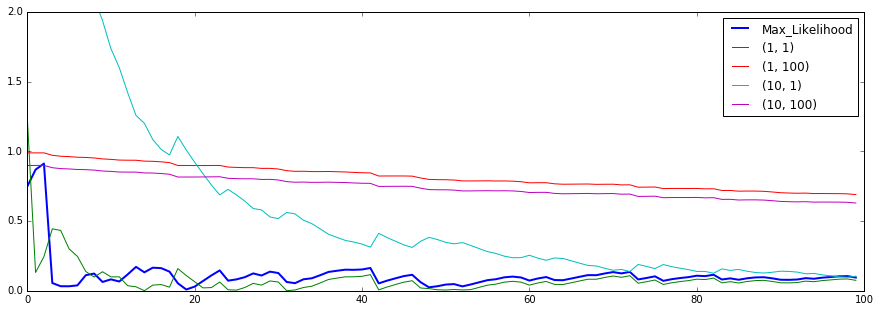

In [194]:
sqr_dev_plot([[1, 1], [1, 100], [10, 1], [10, 100]])

При $(\alpha, \beta) = (1, 1)$ оценка при больших $n$ почти совпадает с ОМП: $\sigma^2 = \overline{x^2}$.

$Вывод:$ при некоторых значениях параметров байесовская оценка может быть лучше ОМП.